In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

In [11]:
def XOR(x, y):
    return x ^ y

def NOT(x):
    return ~x+2

def XNOR(x, y):
    return NOT(XOR(x, y))

In [21]:
# Create the dataset: XNOR Logic Function
# Number of examples.
N = 1000

x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)


y = XNOR(x1,x2)

x1 = x1 + 0.2*np.random.randn(N,)

x2 = x2 + 0.2*np.random.randn(N,)

x0 = np.ones((N,))
X = np.c_[x0,x1,x2]


In [22]:
# Create an instance of Multilayer Perceptrons Classifier and fit the data.
mlp = MLPClassifier(solver='lbfgs',activation='logistic', max_iter=10000,random_state=20, hidden_layer_sizes=(2,))
model = mlp.fit(X, y)

# Predict
y_pred = mlp.predict(X)

error = mean_squared_error(y_pred, y)
print('MSE: ', error)

MSE:  0.255


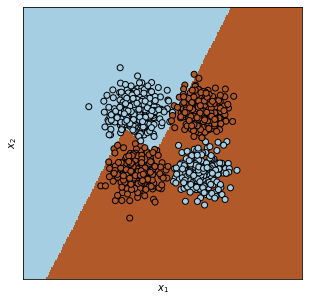

In [28]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = x2.min() - 1, x2.max() + 1
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = mlp.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [29]:
# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

NameError: name 'sns' is not defined

<Figure size 360x360 with 0 Axes>

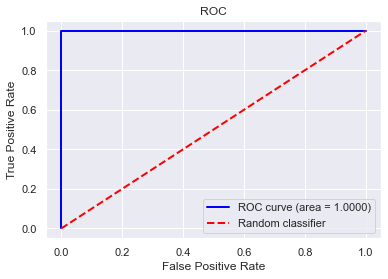

In [30]:
# Getting the probabilities for each class.
y_prob = mlp.predict_proba(X)
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

E. Baseado na curva ROC, qual a área sob a curva?

A área sob a curva é 1.